# ISLR Chapter 3 - Linear Regression

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns


from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

## Exercise 8


### Loading Data

* [Auto.data](https://www.statlearning.com/s/Auto.data)

* [Auto.csv](https://www.statlearning.com/s/Auto.csv)

In [2]:
data = pd.read_csv("Auto.csv",na_values = "?").dropna()

### a
მითითებული `lm()` ფუნქციის ნაცვლად გამოიყენეთ [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

ლაბორატორიულს ჩახედეთ და რაც გამოაქვს `summary()`-ის, იმის ძირითადი კომპონენტები გამოიტანეთ


In [3]:
X_train = data["horsepower"]
y_train = data["mpg"]


In [4]:
d = {'horsepower':X_train.astype('float'), 'mpg':y_train}
df = pd.DataFrame(data=d)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

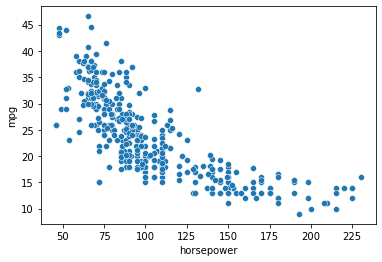

In [5]:
sns.scatterplot(data=data, x="horsepower", y="mpg")

In [6]:
X_pol = np.array(X_train).reshape(-1,1)
y_pol = np.array(y_train).reshape(-1,1)

In [7]:
reg_model_pol = LinearRegression()

In [8]:
reg_model_pol.fit(X_pol, y_pol)

LinearRegression()

In [9]:
X_dots_pol = np.array([[45], [230]])
y_dots_pol = reg_model_pol.predict(X_dots_pol)

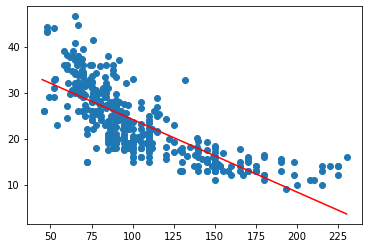

In [10]:
plt.scatter(X_pol, y_pol)

plt.plot(X_dots_pol, y_dots_pol, 'r')

plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_pol_features = poly_features.fit_transform(X_pol)

In [12]:
pol_model = LinearRegression()

pol_model.fit(X_pol_features, y_pol)

LinearRegression()

In [13]:
X_dots_pol = np.linspace(45, 230, 100).reshape(100, 1)

In [14]:
X_dots_pol_features = poly_features.fit_transform(X_dots_pol)

In [15]:
X_dots_pol[:5], X_dots_pol_features[:5], (X_dots_pol ** 2)[:5]

(array([[45.        ],
        [46.86868687],
        [48.73737374],
        [50.60606061],
        [52.47474747]]),
 array([[  45.        , 2025.        ],
        [  46.86868687, 2196.6738088 ],
        [  48.73737374, 2375.33159882],
        [  50.60606061, 2560.97337006],
        [  52.47474747, 2753.59912254]]),
 array([[2025.        ],
        [2196.6738088 ],
        [2375.33159882],
        [2560.97337006],
        [2753.59912254]]))

In [16]:
y_dots_pol = pol_model.predict(X_dots_pol_features)

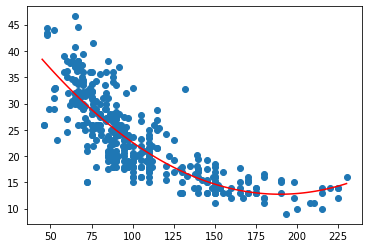

In [17]:
plt.scatter(X_pol, y_pol)

plt.plot(X_dots_pol, y_dots_pol, 'r')

plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_pol_features, y_pol, test_size=0.30, random_state=42)

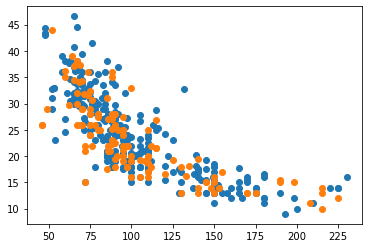

In [19]:
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)

plt.show()

In [20]:
pol_model_split = LinearRegression()

pol_model_split.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = pol_model_split.predict(X_test)

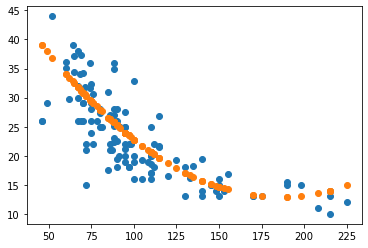

In [22]:
plt.scatter(X_test[:,0], y_test)

plt.scatter(X_test[:,0], y_pred)

plt.show()

In [23]:
((y_test-y_pred) ** 2).mean()

20.451710887533626

In [24]:
r2_score(y_test, y_pred)

0.6134245026663481

In [25]:
mean_squared_error(y_test, y_pred)

20.451710887533626

#### i


In [37]:
X_train = data["horsepower"]
y_train = data["mpg"]
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                    5.67e-91
Time:                        23:20:31   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# ან

In [36]:
X_train = data["horsepower"]
y_train = data["mpg"]

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
f_regression(X_train, y_train, center=True)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(array([599.7177409]), array([7.03198903e-81]))

##### პირველი წევრი არის  F-Statistic, რომელიც მეტია ერთზე და მეორე წევრია არის მისი p-value რომელიც გაცილებით ნაკლებია << 0.005_ზე,რაც მიუთითებს მათ შორის კავშირზე.

#### ii


In [39]:
r2_score(y_test, y_pred)

0.6134245026663481

##### R^2-ი გვიჩვენებს თუ რამდენად რეალურად ხსნის რეგრესიული მოდელი პასუხის ნამდვილ მნიშვნელობებს. R^2 = 0.613 ანუ 61.3%

#### iii


##### უკუპროპორციული დამოკიდებულებაა.ცხენისძალების გაზრდასთან ერთად mpg იკლებს.


### b
`abline()`-ის ნაცვლად თქვენით გამოსახეთ დიაგრამაზე შესაბამისი მოდელის წირი


##### ზევით მაქვს სხვადასხვა სახის გაკეთებული


## Exercise 9


### a


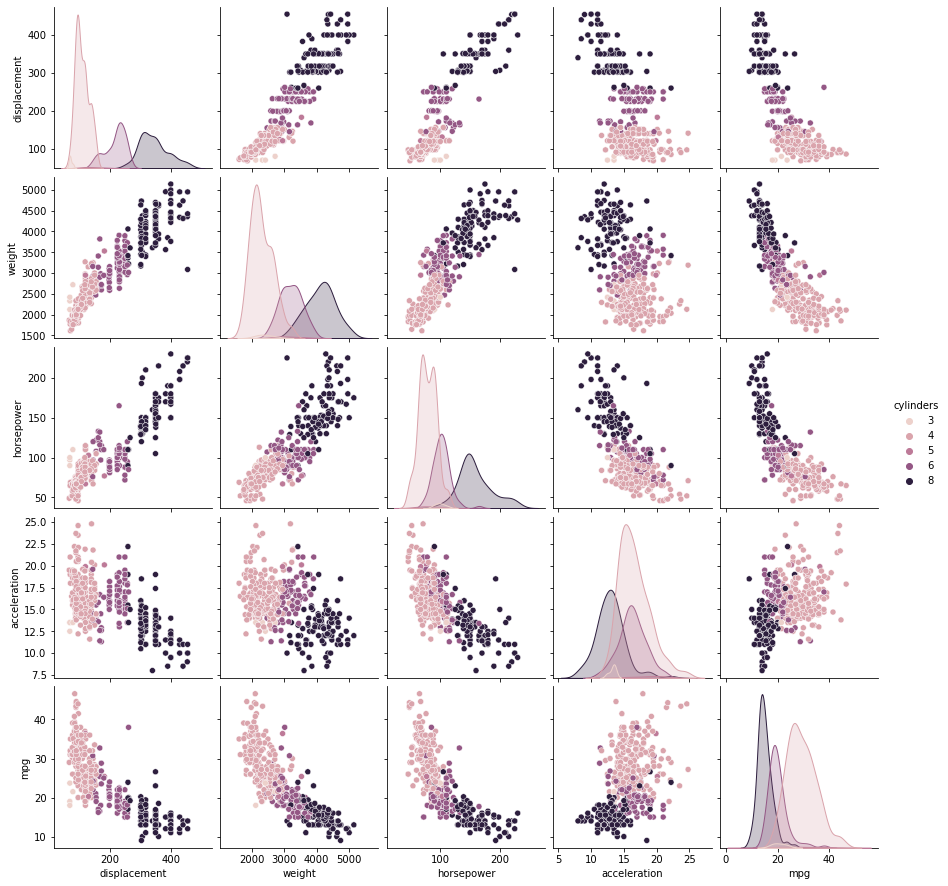

In [45]:
sns.pairplot(data, vars=['displacement', 'weight', 'horsepower', 'acceleration', 'mpg'], hue='cylinders')

### b


In [46]:
data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### c
ლაბორატორიულს ჩახედეთ და რაც გამოაქვს `summary()`-ის, იმის ძირითადი კომპონენტები გამოიტანეთ


In [49]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X, prepend=True)
y = data['mpg']

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          2.04e-139
Time:                        23:43:25   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### i


##### R^2 არის 82% ანუ შეინიშნება კავშირი.

#### iii


#####  displacement, weight, year და origin. მათ გააჩნიათ p-value 0.005ზე ნაკლები.